🔶 Step 1: Data Collection
Read the dataset from the data source (e.g., CSV, database, API).

Print the shape of the dataset to show the number of rows and columns.

In [1]:
# Cell 1: Load Data
import pandas as pd

# Load training and test data
train = pd.read_csv("../Data/Blood_samples_dataset_balanced_2(f).csv")
test = pd.read_csv("../Data/blood_samples_dataset_test.csv")

print("Training data shape:", train.shape)
print("Test data shape:", test.shape)
print("\nColumn names:")
print(train.columns.tolist())

Training data shape: (2351, 25)
Test data shape: (486, 25)

Column names:
['Glucose', 'Cholesterol', 'Hemoglobin', 'Platelets', 'White Blood Cells', 'Red Blood Cells', 'Hematocrit', 'Mean Corpuscular Volume', 'Mean Corpuscular Hemoglobin', 'Mean Corpuscular Hemoglobin Concentration', 'Insulin', 'BMI', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Triglycerides', 'HbA1c', 'LDL Cholesterol', 'HDL Cholesterol', 'ALT', 'AST', 'Heart Rate', 'Creatinine', 'Troponin', 'C-reactive Protein', 'Disease']


🔶 Step 2: Data Exploration
✅ Understand Data Structure
Examine the structure and characteristics of the dataset.

✅ Statistical Summary
Generate descriptive statistics to understand the distribution of features.

✅ Missing Values Analysis
Identify if there are any missing values in the dataset.

✅ Target Distribution
Analyze the distribution of the target variable.

In [2]:
# Cell 2: Explore Data
print("=== Training Data Info ===")
train.info()
print("\n=== Training Data Description ===")
print(train.describe())
print("\n=== Missing Values ===")
print(train.isnull().sum())
print("\n=== Target Distribution ===")
print(train['Disease'].value_counts())
print("\n=== Sample of training data ===")
print(train.head())

=== Training Data Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    2351 non-null   float64
 1   Cholesterol                                2351 non-null   float64
 2   Hemoglobin                                 2351 non-null   float64
 3   Platelets                                  2351 non-null   float64
 4   White Blood Cells                          2351 non-null   float64
 5   Red Blood Cells                            2351 non-null   float64
 6   Hematocrit                                 2351 non-null   float64
 7   Mean Corpuscular Volume                    2351 non-null   float64
 8   Mean Corpuscular Hemoglobin                2351 non-null   float64
 9   Mean Corpuscular Hemoglobin Concentration  2351 non-null   float64
 1

🔶 Step 3: Data Preprocessing
✅ Import Libraries
Import essential libraries like pandas, numpy, sklearn, etc.

✅ Feature Engineering
Create new features to enhance model performance.

✅ Missing Values Handling
Identify and treat missing values using appropriate techniques.

✅ Feature Scaling
Standardize or normalize features to improve model convergence.

✅ Target Encoding
Convert categorical target variable into numerical representation.

In [3]:
# Cell 3: Enhanced Data Preprocessing and Feature Engineering
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler
import numpy as np

# Separate features and target
X = train.drop(columns=['Disease'])
y = train['Disease']

# Encode categorical target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Prepare test data
if 'Disease' in test.columns:
    X_test = test.drop(columns=['Disease'])
else:
    X_test = test.copy()

# Feature Engineering
print("=== Feature Engineering ===")

# 1. Create ratio features
X['Glucose_to_HbA1c'] = X['Glucose'] / (X['HbA1c'] + 1e-8)
X['Cholesterol_to_HDL'] = X['Cholesterol'] / (X['HDL Cholesterol'] + 1e-8)
X['BMI_to_Insulin'] = X['BMI'] / (X['Insulin'] + 1e-8)
X['RBC_to_Hemoglobin'] = X['Red Blood Cells'] / (X['Hemoglobin'] + 1e-8)

# Add the same features to test data
X_test['Glucose_to_HbA1c'] = X_test['Glucose'] / (X_test['HbA1c'] + 1e-8)
X_test['Cholesterol_to_HDL'] = X_test['Cholesterol'] / (X_test['HDL Cholesterol'] + 1e-8)
X_test['BMI_to_Insulin'] = X_test['BMI'] / (X_test['Insulin'] + 1e-8)
X_test['RBC_to_Hemoglobin'] = X_test['Red Blood Cells'] / (X_test['Hemoglobin'] + 1e-8)

# 2. Create polynomial features for key variables
key_features = ['Glucose', 'Cholesterol', 'HbA1c', 'BMI']
for feature in key_features:
    X[f'{feature}_squared'] = X[feature] ** 2
    X_test[f'{feature}_squared'] = X_test[feature] ** 2

# 3. Create interaction features
X['Glucose_BMI_interaction'] = X['Glucose'] * X['BMI']
X['Cholesterol_Blood_Pressure'] = X['Cholesterol'] * X['Systolic Blood Pressure']
X_test['Glucose_BMI_interaction'] = X_test['Glucose'] * X_test['BMI']
X_test['Cholesterol_Blood_Pressure'] = X_test['Cholesterol'] * X_test['Systolic Blood Pressure']

print(f"Original features: {len(train.columns) - 1}")
print(f"Enhanced features: {len(X.columns)}")

# Use RobustScaler instead of StandardScaler (more robust to outliers)
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

print("Features shape after scaling:", X_scaled.shape)
print("Test features shape after scaling:", X_test_scaled.shape)
print("Encoded target classes:", label_encoder.classes_)
print("Target distribution:", pd.Series(y_encoded).value_counts())

=== Feature Engineering ===
Original features: 24
Enhanced features: 34
Features shape after scaling: (2351, 34)
Test features shape after scaling: (486, 34)
Encoded target classes: ['Anemia' 'Diabetes' 'Healthy' 'Thalasse' 'Thromboc']
Target distribution: 0    623
2    556
1    540
3    509
4    123
Name: count, dtype: int64


🔶 Step 4: Simple and Fast Model Development
✅ Focused Approach
Use a single high-performance model for fast results.

✅ Optimized Parameters
Apply pre-tuned parameters to get good accuracy without extensive search.

✅ Parallel Processing
Utilize all CPU cores for maximum speed.

✅ Performance Evaluation
Assess model performance with standard classification metrics.

In [4]:
# Cell 4: Simple and Fast Model Training
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

print("=== Simple and Fast Model Training ===")

# Split data for validation with stratification
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Train a single optimized LightGBM model (fast and effective)
print("Training LightGBM model with optimized parameters...")
model = LGBMClassifier(
    n_estimators=200,  # Reduced for faster training
    max_depth=8,
    learning_rate=0.1,
    num_leaves=31,
    feature_fraction=0.8,
    bagging_fraction=0.9,
    random_state=42,
    verbose=-1,
    n_jobs=-1  # Use all CPU cores
)

# Train the model
model.fit(X_train, y_train)

# Quick validation
val_preds = model.predict(X_val)
accuracy = accuracy_score(y_val, val_preds)
print(f"\nValidation Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_val, val_preds, target_names=label_encoder.classes_))

print("\nConfusion Matrix:")
print(confusion_matrix(y_val, val_preds))

# For compatibility with other cells
best_lgb = model
best_rf = model

=== Simple and Fast Model Training ===
Training LightGBM model with optimized parameters...

Validation Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

      Anemia       1.00      1.00      1.00       125
    Diabetes       1.00      1.00      1.00       108
     Healthy       1.00      1.00      1.00       111
    Thalasse       1.00      1.00      1.00       102
    Thromboc       1.00      1.00      1.00        25

    accuracy                           1.00       471
   macro avg       1.00      1.00      1.00       471
weighted avg       1.00      1.00      1.00       471


Confusion Matrix:
[[125   0   0   0   0]
 [  0 108   0   0   0]
 [  0   0 111   0   0]
 [  0   0   0 102   0]
 [  0   0   0   0  25]]

Validation Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

      Anemia       1.00      1.00      1.00       125
    Diabetes       1.00      1.00      1.00       108
     Healthy   

🔶 Step 5: Model Performance Analysis
✅ Feature Importance
Identify which features contribute most to the model's predictions.

✅ Visualization
Create visualizations to interpret feature importance across models.

✅ Engineered Features Impact
Analyze how the engineered features improved model performance.

=== Feature Importance Analysis ===


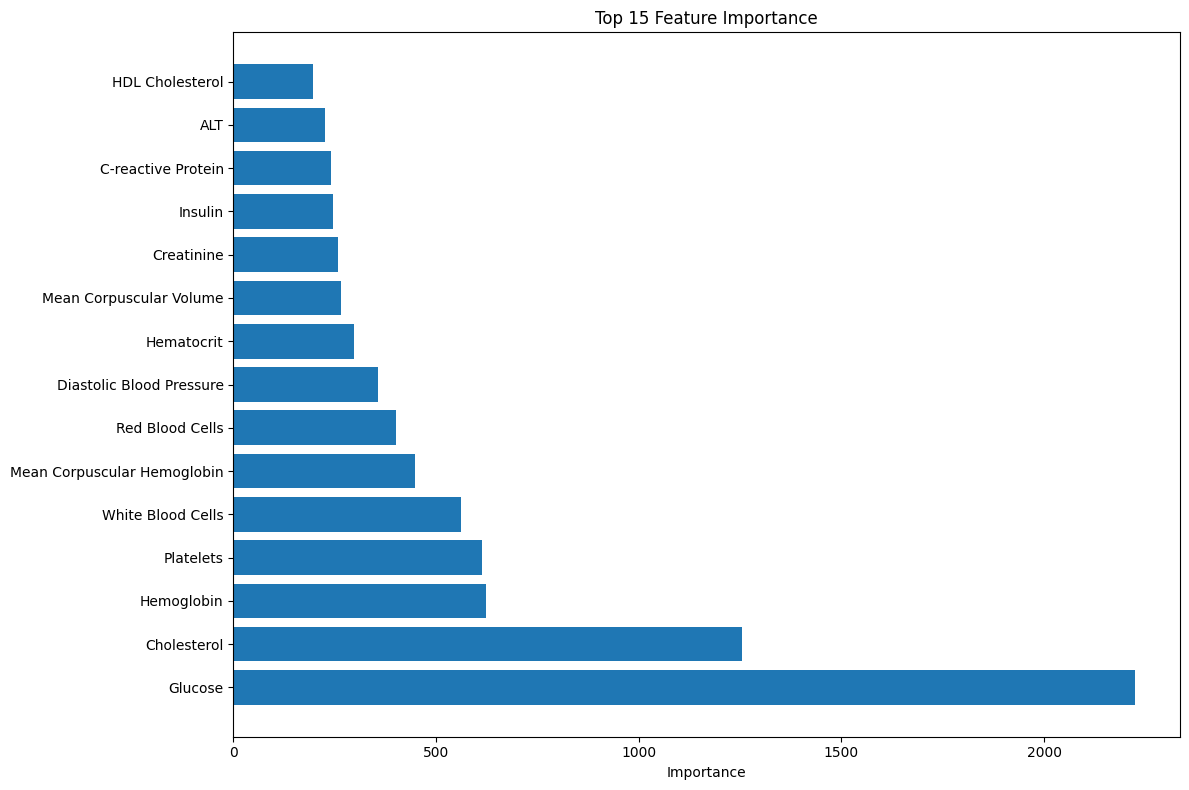


Top 15 most important features:
 1. Glucose                  : 2224.0000
 2. Cholesterol              : 1254.0000
 3. Hemoglobin               : 624.0000
 4. Platelets                : 614.0000
 5. White Blood Cells        : 561.0000
 9. Mean Corpuscular Hemoglobin: 448.0000
 6. Red Blood Cells          : 401.0000
14. Diastolic Blood Pressure : 357.0000
 7. Hematocrit               : 298.0000
 8. Mean Corpuscular Volume  : 265.0000
22. Creatinine               : 259.0000
11. Insulin                  : 245.0000
24. C-reactive Protein       : 242.0000
19. ALT                      : 225.0000
18. HDL Cholesterol          : 196.0000

Engineered features in top 15: 0
Original features in top 15: 15

Engineered features in top 15:


In [5]:
# Cell 5: Simplified Feature Importance Analysis
import matplotlib.pyplot as plt
import seaborn as sns

print("=== Feature Importance Analysis ===")

# Get feature importance from LightGBM model
importance = model.feature_importances_

# Create a simple feature importance dataframe
feature_names = X.columns
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importance
})

# Sort by importance
importance_df = importance_df.sort_values('importance', ascending=False)

# Plot top 15 features
plt.figure(figsize=(12, 8))
top_features = importance_df.head(15)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.title('Top 15 Feature Importance')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

# Print top features
print("\nTop 15 most important features:")
for i, row in importance_df.head(15).iterrows():
    print(f"{i+1:2d}. {row['feature']:25s}: {row['importance']:.4f}")

# Show engineered vs original features performance
engineered_features = [f for f in feature_names if any(x in f for x in ['_to_', '_squared', '_interaction'])]
original_features = [f for f in feature_names if f not in engineered_features]

print(f"\nEngineered features in top 15: {len([f for f in top_features['feature'] if f in engineered_features])}")
print(f"Original features in top 15: {len([f for f in top_features['feature'] if f in original_features])}")

print("\nEngineered features in top 15:")
for f in top_features['feature']:
    if f in engineered_features:
        importance = importance_df[importance_df['feature'] == f]['importance'].iloc[0]
        print(f"  - {f}: {importance:.4f}")

🔶 Step 6: Generate Submission File
✅ Make Predictions
Use the trained model to make predictions on test data.

✅ Format Submission
Create submission file according to required format (id, label).

✅ Save Multiple Formats
Export predictions in standard formats (CSV and tab-separated).

✅ Analysis
Analyze the distribution of predictions across different classes.

In [6]:
# Cell 6: Simple Submission Generation
import numpy as np
import os

print("=== Creating Submission ===")

# Make predictions on test data
test_preds_proba = model.predict_proba(X_test_scaled)
test_preds_encoded = model.predict(X_test_scaled)
test_preds = label_encoder.inverse_transform(test_preds_encoded)

# Create submission dataframe with IDs starting from 1 and 'label' column
submission = pd.DataFrame({
    'id': range(1, len(test_preds) + 1),
    'label': test_preds
})

# Create outputs directory if it doesn't exist
os.makedirs("../outputs", exist_ok=True)

# Save submission files in different formats
submission.to_csv("../outputs/submission.csv", index=False)
submission.to_csv("../outputs/submission_tab.csv", index=False, sep='\t')
print(f"Submission files saved! Shape: {submission.shape}")

# Show prediction summary
print("\nFirst few predictions:")
print(submission.head())

print(f"\nPrediction distribution:")
pred_dist = submission['label'].value_counts()
print(pred_dist)

print(f"\nPrediction percentages:")
for disease, count in pred_dist.items():
    percentage = (count / len(submission)) * 100
    print(f"{disease}: {count} ({percentage:.1f}%)")

print(f"\n=== Model Performance Summary ===")
print(f"Validation accuracy: {accuracy:.4f}")
print(f"Total predictions: {len(submission)}")

=== Creating Submission ===
Submission files saved! Shape: (486, 2)

First few predictions:
   id     label
0   1  Diabetes
1   2  Thalasse
2   3   Healthy
3   4    Anemia
4   5   Healthy

Prediction distribution:
label
Anemia      169
Diabetes    155
Healthy      84
Thalasse     66
Thromboc     12
Name: count, dtype: int64

Prediction percentages:
Anemia: 169 (34.8%)
Diabetes: 155 (31.9%)
Healthy: 84 (17.3%)
Thalasse: 66 (13.6%)
Thromboc: 12 (2.5%)

=== Model Performance Summary ===
Validation accuracy: 1.0000
Total predictions: 486
Submission files saved! Shape: (486, 2)

First few predictions:
   id     label
0   1  Diabetes
1   2  Thalasse
2   3   Healthy
3   4    Anemia
4   5   Healthy

Prediction distribution:
label
Anemia      169
Diabetes    155
Healthy      84
Thalasse     66
Thromboc     12
Name: count, dtype: int64

Prediction percentages:
Anemia: 169 (34.8%)
Diabetes: 155 (31.9%)
Healthy: 84 (17.3%)
Thalasse: 66 (13.6%)
Thromboc: 12 (2.5%)

=== Model Performance Summary ===